In [2]:
#LIME on Text
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

import lime
from lime.lime_text import LimeTextExplainer

import numpy as np
import matplotlib.pyplot as plt

# Sample text data
texts = [
    "I love this movie, it is fantastic!",
    "This film was terrible, I hated it.",
    "An amazing experience, absolutely wonderful.",
    "Worst movie ever, completely awful.",
    "It was okay, not the best but not the worst."
]
labels = [1, 0, 1, 0, 1]  # 1 for positive, 0 for negative sentiment

vectorizer=TfidfVectorizer()
X=vectorizer.fit_transform(texts)

classifier=LogisticRegression()
classifier.fit(X,labels)

pipeline=make_pipeline(vectorizer,classifier)
explainer=LimeTextExplainer(class_names=['Negative','Positive'])

sample_text='I really enjoyed this film, it was fantastic.'

exp=explainer.explain_instance(sample_text,pipeline.predict_proba,num_features=5)
exp.show_in_notebook(text=True)
plt.show()

  0%|          | 0/100 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


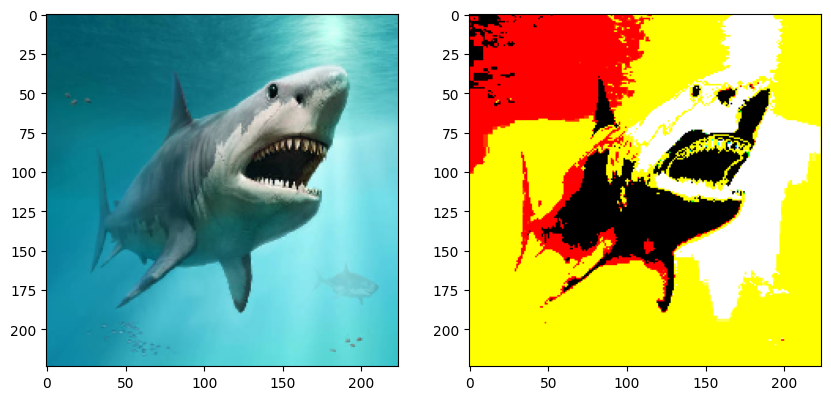

In [5]:
#LIME on Image
import numpy as np
import matplotlib.pyplot as plt

from skimage.segmentation import mark_boundaries

import lime
from lime.lime_image import LimeImageExplainer

import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16,decode_predictions,preprocess_input
from tensorflow.keras.preprocessing import image


model=VGG16(weights='imagenet')
img=image.load_img("shark.jpg",target_size=(224,224))
img_array=image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array=preprocess_input(img_array)

def predict_fn(images):
    return model.predict(preprocess_input(images))

explainer=LimeImageExplainer()
explanation=explainer.explain_instance(img_array[0].astype('double'),
                                       predict_fn,
                                       top_labels=1,
                                       hide_color=1,
                                       num_samples=100)

temp,mask=explanation.get_image_and_mask(explanation.top_labels[0],
                                         positive_only=True,
                                         num_features=5)

#Displaying the results
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(img)
plt.subplot(1,2,2)
plt.imshow(mark_boundaries(temp,mask))
plt.show()

In [1]:
#LIME on Tabular data
import numpy as np
import pandas as pd

from sklearn.ensemble import RandomForestClassifier

from lime.lime_tabular import LimeTabularExplainer

own_data={"Feature1":[1,2,3,4,5],
          "Feature2":[5,4,3,2,1],
          "Feature3":[10,20,30,40,50],
          "Feature4":[50,40,30,20,10]
          }

data=pd.DataFrame(own_data)
labels=np.array([0,1,0,1,0])

model=RandomForestClassifier(random_state=2)
model.fit(data,labels)

#The sample instance is the entire row
#It predicts which is the most important feature predicting the label
sample_instance=data.iloc[2].values.reshape(1,-1)
predict_fn=model.predict_proba

explainer=LimeTabularExplainer(training_data=data.values,
                               feature_names=data.columns.tolist(),
                               mode='classification'
                              )

explanation=explainer.explain_instance(data_row=sample_instance[0],
                                       predict_fn=predict_fn,
                                       num_features=4
                                       )
explanation.show_in_notebook()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
